# **Classical ML**

Welcome to **Module L2: Classical ML**.

In L1, we built the *engine* (Linear Algebra). In L2, we teach the engine how to *drive itself* (Learning).

We are shifting focus from "calculating outputs" to **optimizing weights**.

## **Concept 1: Linear Regression & Gradient Descent**

**Intuition**

Linear Regression is the "Hello World" of Machine Learning. Fundamentally, it tries to fit a straight line through data points to predict a continuous value. Imagine you have data on house sizes and prices. Linear regression tries to draw the "best fit" line so that if you give it a new size, it can tell you the probable price.

The core logic revolves around two things:
1.  **The Hypothesis:** Our guess. For a simple line, it's $y = wx + b$. Here, $w$ (weight) controls the slope, and $b$ (bias) controls the intercept. In high dimensions, this becomes a hyperplane.
2.  **The Cost Function (MSE):** A scoreboard telling us how bad our guess is. We typically use Mean Squared Error (MSE), which measures the average squared distance between our predicted line and the actual data points.

**Mechanics: Gradient Descent**

How do we find the perfect $w$ and $b$? We don't guess randomly. We use **Gradient Descent**.
Imagine you are standing on top of a mountain (high error) blindfolded, and you want to reach the valley (lowest error). You feel the slope of the ground under your feet. If the slope tilts down to the right, you take a step to the right. You repeat this until the ground is flat.

Mathematically:

1.  Calculate the gradient (slope) of the cost function with respect to $w$ and $b$.
2.  Update $w$ and $b$ by moving in the **opposite** direction of the gradient.
3.  The size of the step is determined by the **Learning Rate** ($\alpha$).

**Formulas for Update:**

$$\frac{\partial J}{\partial w} = \frac{-2}{n} \sum_{i=1}^{n} x_i (y_i - (wx_i + b))$$
$$\frac{\partial J}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))$$

$$w_{new} = w_{old} - \alpha \times \frac{\partial J}{\partial w}$$
$$b_{new} = b_{old} - \alpha \times \frac{\partial J}{\partial b}$$

---

#### The "Plain English" Version

Forget the calculus for a second. Gradient Descent is just a **correction loop**.

Imagine you are an archer firing arrows ($y_{pred}$) at a target ($y$).
1.  **Shoot:** You fire an arrow based on your current aim ($w, b$).
2.  **Measure:** You see you missed by 5 inches to the left (`error`).
3.  **Correct:** You adjust your aim to the right.

The "Gradient" is just the **instruction on how to adjust**.

#### The Simplified Logic (Code-Ready)

Here is how the math translates directly into `numpy` logic:

1.  **Prediction:**
    `y_pred = w * x + b`

2.  **Error:**
    `error = y_pred - y`  *(How far off are we?)*

3.  **The "Slope" (Gradient):**
    * **For `w`:** We check the error and multiply it by the input `x`. Why? Because if `x` is big, it contributed *more* to the error, so `w` needs a bigger change.
    * **For `b`:** It's just the average error.
    * *Note: The `2` comes from the squared math, just keep it there.*

    `w_gradient = mean(2 * error * x)`
    
    `b_gradient = mean(2 * error)`

5.  **The Update:**
    We move opposite to the error to fix it.
    
    `w = w - (learning_rate * w_gradient)`
    
    `b = b - (learning_rate * b_gradient)`

---


**Trade-offs & Pitfalls**

* **Scale Sensitivity:** Gradient Descent struggles if features are on vastly different scales (e.g., "Number of Rooms" vs "Price"). The algorithm will zigzag inefficiently. **Feature scaling is mandatory** for non-trivial problems.
* **Learning Rate:** If $\alpha$ is too high, you overshoot the minimum and diverge (explode). If too low, training takes forever.
* **Local Minima:** In linear regression, the cost surface is a convex bowl (only one global minimum), so we are safe. In Neural Networks, getting stuck in local minima is a real danger.



### Your Task: Manual Gradient Descent
Implement Gradient Descent from scratch using only `numpy`..

**Specifications
:**
1.  **Generate Data:** Create `X = np.array([1, 2, 3, 4, 5])` and `y = np.array([5, 7, 9, 11, 13])`. (Notice the relationship is exactly $y = 2x + 3$).
2.  **Initialize:** Start with $w=0, b=0$.
3.  **Iterate:** Run a loop for `1000` epochs.
    * Calculate predictions.
    * Calculate the gradients for $w$ and $b$ using the formulas above.
    * Update $w$ and $b$.
4.  **Output:** Print the final values of `w` and `b`. They should be very close to `2.0` and `3.0`.


**Forbidden Shortcuts:** Do not use `sklearn` or any auto-differentiation libraries.

In [ ]:
import numpy as np
import time

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

w = 0
b = 0
learning_rate = 0.01

start_time = time.time()

for _ in range(1000):
    ## y = mx + c
    y_pred = w*x + b
    
    ## Error
    error = y_pred - y
    
    ## Calculate Gradients
    w_gradient = np.mean(2 * error * x)
    b_gradient = np.mean(2 * error)

    ## Update weight and bias
    w = w - (learning_rate * w_gradient)
    b = b - (learning_rate * b_gradient)

end_time = time.time()

print(f"Weight = {w}\nBias = {b}\nTime Taken for 1000 epochs = {end_time - start_time} secs")

**Code Review:**

Calculate prediction $\to$ find error $\to$ use error to find direction (gradient) $\to$ step towards the target.

  * **Weight (`w`):** Should be extremely close to `2.0` (likely `2.021281045682893`).
  * **Bias (`b`):** Should be extremely close to `3.0` (likely `2.923168672645527`).

Your use of `np.mean` handles the summation and division by `n` efficiently.


## **Concept 2: Logistic Regression (The Classification Shift)**

**Intuition: Why not just use the line?**

Linear regression predicts *how much* (e.g., price, height). But what if we want to predict *Yes/No* (e.g., Will this passenger survive? Is this email spam?)?
If we use a straight line, for very large inputs, the output could be `100` or `-50`. But probabilities must be between `0` and `1`.

We need to "bend" our line into an "S" shape.

**Mechanics: The Sigmoid Activation**

We wrap our linear output ($z = wx + b$) in a **Sigmoid** function:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

  * If $z$ is huge positive $\to$ output $\approx 1$.
  * If $z$ is huge negative $\to$ output $\approx 0$.
  * If $z$ is 0 $\to$ output $= 0.5$.

**The New Scoreboard: Log Loss (Binary Cross Entropy)**

We cannot use MSE anymore. If we use MSE with Sigmoid, the cost surface becomes wavy (non-convex), and Gradient Descent gets stuck in local valleys.

We use **Log Loss**. It penalizes **confidence in the wrong answer**.

  * If true value is `1` but you predict `0.01` (confident it's 0), Log Loss gives a massive penalty.
  * If true value is `1` and you predict `0.99`, penalty is near zero.

$$J = - \frac{1}{n} \sum [y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

---

#### The "Plain English" Version

##### 1\. Sigmoid: "The Squasher"

Linear regression ($z = wx+b$) is like a wild cannon; it shoots numbers anywhere from $-1,000,000$ to $+1,000,000$.
But for classification (Yes/No), we need a **Probability**, which must be strictly between **0% and 100%** (0 and 1).

**Sigmoid is a filter.** It takes that wild number $z$ and squashes it:

  * If the number is huge (e.g., 5000) $\to$ Sigmoid turns it into `0.9999` (Basically 1).
  * If the number is tiny (e.g., -5000) $\to$ Sigmoid turns it into `0.0001` (Basically 0).
  * If the number is 0 (unsure) $\to$ Sigmoid turns it into `0.5` (50/50 chance).

**In short:** It forces the math to behave like a probability.

-----

##### 2\. Log Loss: "The Arrogance Penalty"

Why can't we just measure distance (MSE)? Because in probability, being **wrong and confident** is much worse than being **wrong and unsure**.

Imagine the truth is **YES (1)**.

  * **Model A says:** "Maybe 40% (0.4)?" $\to$ It's wrong, but not arrogant.
  * **Model B says:** "Absolutely NOT 0% (0.0)\!" $\to$ It's wrong **and** completely confident.

**Log Loss** punishes Model B massively.

  * If you predict `0.99` and truth is `1`: Loss is tiny (Good job).
  * If you predict `0.01` and truth is `1`: Loss is **HUGE** (You were confidently wrong).

**The Formula Logic:**
$$- [y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$
It looks complex, but it's just an "If/Else" switch:

  * **If correct answer is 1 ($y=1$):** Only the first part matters. We want $\log(\hat{y})$ to be small (which happens if $\hat{y}$ is close to 1).
  * **If correct answer is 0 ($y=0$):** Only the second part matters. We want $\log(1-\hat{y})$ to be small.


---


### Your Task: Implement Sigmoid and Log Loss

Translate the formulas above into two Python functions.

**Specifications:**

1.  **Function 1 `sigmoid(z)`:** Takes a numpy array `z` and returns the sigmoid transformation.
2.  **Function 2 `log_loss(y_true, y_pred)`:** Takes true labels and predicted probabilities, and returns the single float loss value.
3.  **Test Data:**
    ```python
    z = np.array([-5, 0, 5]) 
    y_true = np.array([0, 1, 1])
    # Pass z into sigmoid to get y_pred, then pass y_pred into log_loss
    ```
4.  **Constraint:** Use `np.exp` and `np.log`.


In [ ]:
import numpy as np

def sigmoid(z):
    y_pred = 1/ (1 + np.exp(-z))
    return y_pred

def log_loss(y_true, y_pred):
    loss_value = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss_value)


z = np.array([-5, 0, 5]) 
y_true = np.array([0, 1, 1])

y_pred = sigmoid(z)
loss_value = log_loss(y_true, y_pred)
print(f"y_true = {y_true}\ny_pred = {y_pred}\nloss_value = {loss_value}")


* **Sigmoid outputs:** Correctly mapped: negative $\to \sim 0$, zero $\to 0.5$, positive $\to \sim 1$.
* **Loss:** `0.2355`. This low number makes sense because your predictions were mostly correct (predicting $\sim 0$ for class 0, and $\sim 1$ for class 1), except for the middle case ($0.5$) which incurred some penalty.

---


## **Concept 3: Bias-Variance Tradeoff**

**Intuition: The "Study Habits" Analogy**

This concept determines whether your model is actually *learning* or just *memorizing*.

1.  **Underfitting (High Bias):** Imagine a student who barely studies and answers "C" for every question. They are too simple-minded. They ignore the patterns in the data.
    * **Symptoms:** High error on Training data AND High error on Test data.
    * **Cause:** Model is too simple (e.g., fitting a straight line to a curved sine wave).

2.  **Overfitting (High Variance):** Imagine a student who memorizes the textbook word-for-word but doesn't understand the concepts. If you ask a slightly different question, they fail. They are hypersensitive to noise.
    * **Symptoms:** Extremely low error on Training data (Perfect score), but High error on Test data.
    * **Cause:** Model is too complex (e.g., a polynomial that wiggles to hit every single data point).



**Mechanics: The "Sweet Spot"**

Our goal is the **Goldilocks Zone**: complex enough to capture the pattern, simple enough to ignore the noise.

We diagnose this using **Learning Curves**:

* **Gap:** If Training score >>> Test score $\to$ Overfitting (High Variance).
* **Low Scores:** If both scores are bad $\to$ Underfitting (High Bias).

**Trade-offs:**

* To fix **Bias** (Underfitting): Make model more complex (add features, deeper trees, polynomial terms).
* To fix **Variance** (Overfitting): Make model simpler (more data, regularization, prune trees).

### Your Task: Visualize the Tradeoff

We will generate a curved dataset (sine wave) and try to fit it with a line (Underfitting) and a crazy high-degree polynomial (Overfitting).

**Specifications:**
1.  **Data Generation:**
    * `x`: 30 points between 0 and 6 (use `np.linspace`).
    * `y`: `sin(x)` + some random noise (`np.random.normal`).
2.  **Model 1 (High Bias):** Fit a **Degree 1** polynomial (a line) using `np.polyfit`.
3.  **Model 2 (High Variance):** Fit a **Degree 15** polynomial using `np.polyfit`.
4.  **Plotting:**
    * Plot the raw scatter points `x` vs `y`.
    * Plot the line from Model 1.
    * Plot the curve from Model 2.
5.  **Output:** Display the plot.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6, 30)
y_clean = np.sin(x)
b = np.random.normal(0, 1, 30)
y_noise = y_clean + b

## Degree 1
coeff1 = np.polyfit(x, y_noise, 1)
model1 = np.poly1d(coeff1)
y1 = model1(x)

## Degree 15
coeff15 = np.polyfit(x, y_noise, 15)
model15 = np.poly1d(coeff15)
y15 = model15(x)

plt.figure(figsize = (10, 4))
plt.scatter(x, y_clean, color = "Blue", marker = "*", label = "Clean Data")
plt.plot(x, y_noise, color = "Green", marker = "*", label = "Noisy Data")
plt.plot(x, y1, color = "Red", marker = "o", label = "Model - Degree 1", linestyle = "--")
plt.plot(x, y15, color = "Orange", marker = "o", label = "Model - Degree 15", linestyle = "-.")
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.legend()
plt.title("Bias-Variance tradeoff : Degree 1 vs Degree 15")
plt.show()


* **Red Line (Degree 1 - High Bias):** It's too rigid. It ignores the sine wave pattern completely, leading to **Underfitting**. It will have high error on both training and test data.
* **Orange/Yellow Curve (Degree 15 - High Variance):** It's too wild. It aggressively tries to touch every single noisy point (the green stars). It has "memorized" the noise. If we added new clean data, this model would fail miserably because it's chasing the green spikes, not the blue sine wave. This is **Overfitting**.



### **TASK**

**Question:**

You are given a dataset of 15 points representing a noisy sine wave. The clean sine wave values are:

* x: Create 15 points between $0$ and $2\pi$ (roughly 0 to 6.28).
* y_true: Calculate `np.sin(x)`.
* y_noise: Add random normal noise (scale=0.2) to `Y Truth`.

Fit polynomial regression models from degree 1 to 15 to the noisy data, visualize all 15 fits with distinct colors, and identify which degree produces the best and worst approximation of the true sine wave.

**Hint:** To generate 15 distinct colors for the plots, use `tab20(np.linspace(0, 1, 15))` from Matplotlib's colormap module.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import tab20  # 20 unique colors

## Data Generation
x = np.linspace(0, (2*np.pi), 15)
y_clean = np.sin(x)
np.random.seed(0)
y_noise = y_clean + np.random.normal(0, 0.2, 15)
y_preds = []

## Visualization Setup
plt.figure(figsize=(10, 5))

plt.scatter(x, y_noise, color="orange", label="Noise Data")
plt.plot(x, y_clean, linestyle="--", color="black", label="True Sine Wave")

## Model Degrees 1–15
colors = tab20(np.linspace(0, 1, 15))  # 15 unique colors

for degree in range(1,16):
    coeff = np.polyfit(x, y_noise, degree)
    model = np.poly1d(coeff)
    y_pred = model(x)
    plt.plot(x, y_pred, color=colors[degree-1], label=f"Degree {degree}")
    y_preds.append(y_pred)

## Labels & Styling
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Polynomial Fits from Degree 1 to 15")
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

mse = []
for yp in y_preds:
    mse.append(np.mean((yp - y_clean)**2))
min_val = np.min(mse)
idx_min = np.argmin(mse)
max_val = np.max(mse)
idx_max = np.argmax(mse)

plt.figure(figsize = (10, 5))
plt.scatter(x, y_noise, marker = "o", color = "Orange", label = "Noise Data")
plt.plot(x, y_clean, marker = "o", color = "Black", linestyle = "--", label = "True Sine Wave")
plt.plot(x, y_preds[idx_min], marker = "*", color = "Red", label = f"Model - Degree {idx_min+1} - Closest")
plt.plot(x, y_preds[idx_max], marker = "*", color = "Blue", label = f"Model - Degree {idx_max+1} - Farthest")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.title("Most and least similar to Sine wave")
plt.show()

## **Concept 4: Evaluation Metrics**

**Intuition: Beyond Accuracy**

"Accuracy" is dangerous.

Imagine you are building a cancer detection system where only 1% of patients have cancer.
If your model simply guesses **"No Cancer"** for everyone, it gets **99% Accuracy**.

BUT, it kills every patient who actually has cancer. It is a useless model.

We need better metrics to catch this.

**Mechanics: The Confusion Matrix**

Everything starts here. It breaks predictions into 4 buckets:
1.  **True Positive (TP):** We predicted Cancer, they have Cancer. (Good)
2.  **True Negative (TN):** We predicted Healthy, they are Healthy. (Good)
3.  **False Positive (FP):** We predicted Cancer, they are Healthy. (False Alarm - "Type I Error")
4.  **False Negative (FN):** We predicted Healthy, they have Cancer. (Missed Detection - "Type II Error" - **Dangerous**)


**The Big Three Metrics:**
1.  **Precision:** "Of all the times we cried wolf, how often was there a wolf?"
    * Formula: $TP / (TP + FP)$
    * *Use when:* False Alarms are expensive (e.g., Spam filter blocking real email).
2.  **Recall (Sensitivity):** "Of all the actual wolves, how many did we find?"
    * Formula: $TP / (TP + FN)$
    * *Use when:* Missing a positive is dangerous (e.g., Cancer detection).
3.  **F1 Score:** The harmonic mean of Precision and Recall. It balances them.
    * Formula: $2 * (Precision * Recall) / (Precision + Recall)$

**ROC-AUC (Receiver Operating Characteristic - Area Under Curve):**
* Plots **True Positive Rate** vs. **False Positive Rate** at different thresholds.
* **AUC = 1.0:** Perfect model.
* **AUC = 0.5:** Random guessing.
* *Intuition:* How good is your model at ranking positive cases higher than negative ones?

### Your Task: Manual Calculation
Do not use `sklearn` yet. Compute these metrics manually.

**Specifications:**
1.  **Data:**
    * `y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])`
    * `y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])`
2.  **Calculate:**
    * **TP, TN, FP, FN** (Count them using logic or loops).
    * **Precision**
    * **Recall**
    * **F1 Score**
3.  **Output:** Print all 7 values.

In [ ]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

tp = np.sum((y_true == 1) & (y_pred == 1))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))
tn = np.sum((y_true == 0) & (y_pred == 0))

precision = tp / (tp + fp)
recall = tp/ (tp + fn)

f1 = (2 * precision * recall)/ (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nF1 Score = {f1}")

---

## **Concept 4A: The ROC Curve (Receiver Operating Characteristic)**

**Intuition: The "Moving Threshold"**

Most classifiers output a probability (e.g., 0.8, 0.3). To make a decision (Yes/No), you must pick a cut-off point, called the **Threshold**.
* Standard threshold: 0.5.
* Strict threshold: 0.9 (Only say "Yes" if absolutely certain).
* Loose threshold: 0.1 (Say "Yes" even if there is a small chance).

Changing the threshold changes your errors.
* **Lower Threshold (e.g., 0.1):** You catch more positives (High Recall), but you get more False Alarms.
* **Higher Threshold (e.g., 0.9):** You have fewer False Alarms, but you miss actual positives (Low Recall).

The **ROC Curve** visualizes this trade-off by plotting the performance at **every possible threshold**.

**Mechanics: The Axes**

The curve plots two enemies against each other:
1.  **Y-Axis: True Positive Rate (TPR)** (aka Recall/Sensitivity).
    * Formula: $\frac{TP}{TP + FN}$
    * *Goal:* We want this to be **1.0**.
2.  **X-Axis: False Positive Rate (FPR)**.
    * Formula: $\frac{FP}{TN + FP} = \frac{FP}{\text{Total Actual Negatives}}$
    * *Goal:* We want this to be **0.0**.
      

**How the Curve is Drawn:**

We start with a threshold of 1.0 (Top Right of the probability distribution) and slide it down to 0.0.
* At **1.0**: You predict "0" for everyone. TPR=0, FPR=0. (Bottom-Left corner).
* At **0.0**: You predict "1" for everyone. TPR=1, FPR=1. (Top-Right corner).
* The **curve** connects these points. A good model bows up towards the **Top-Left corner** (High TPR, Low FPR).

### Task 4A: Manual Thresholding
You will manually act as the "Threshold Slider" to see how TPR and FPR change.

**Specifications:**
1.  **Data:**
    * `y_true = [0, 1, 0, 1]`
    * `y_prob = [0.1, 0.4, 0.6, 0.8]`
2.  **Scenario 1 (High Threshold = 0.5):**
    * If `prob >= 0.5`, predict 1. Else 0.
    * Calculate TPR and FPR.
3.  **Scenario 2 (Low Threshold = 0.2):**
    * If `prob >= 0.2`, predict 1. Else 0.
    * Calculate TPR and FPR.

**Output:** Print the TPR and FPR for both scenarios.


In [ ]:
y_true = np.array([0, 1, 0, 1])
y_prob = np.array([0.1, 0.4, 0.6, 0.8])

# If prob >= 0.5, predict 1. Else 0.
y_new1 = np.array([1 if i > 0.5 else 0 for i in y_prob])
tp = np.sum((y_new1 == 1) & (y_true == 1))
fp = np.sum((y_new1 == 1) & (y_true == 0))
fn = np.sum((y_new1 == 0) & (y_true == 1))
tn = np.sum((y_new1 == 0) & (y_true == 0))

tpr1 = tp/(tp + fn)
fpr1 = fp/(tn + fp)

print(f"TPR1 = {tpr1}, FPR1 = {fpr1}")

# If prob >= 0.2, predict 1. Else 0.
y_new2 = np.array([1 if i > 0.2 else 0 for i in y_prob])
tp = np.sum((y_new2 == 1) & (y_true == 1))
fp = np.sum((y_new2 == 1) & (y_true == 0))
fn = np.sum((y_new2 == 0) & (y_true == 1))
tn = np.sum((y_new2 == 0) & (y_true == 0))

tpr2 = tp/(tp + fn)
fpr2 = fp/(tn + fp)

print(f"TPR2 = {tpr2}, FPR2 = {fpr2}")


---

## **Concept 4B: AUC (Area Under the Curve)**

**Intuition: The "Ranking" Score**

While the ROC Curve is a line, **AUC** is the single number summary (the area under that line).
* **AUC = 1.0:** Perfect ranking.
* **AUC = 0.5:** Random guessing.

**The "Pairs" Logic (Best Intuition):**

AUC represents the probability that your model ranks a random **Positive** example higher than a random **Negative** example.
If you have an AUC of **0.75**, it means if I give you one spam email and one real email, your model has a 75% chance of giving the spam email a higher "spam score".

* **AUC** measures **Potential**. It tells you: *"How well separated are the Positives and Negatives?"* If AUC is high (e.g., 0.99), it means the Positives are all clustered at the top and Negatives at the bottom.
* **Accuracy/Precision** measures **Performance at a specific Cut-off**. Even if your AUC is 0.99, if you choose a stupid threshold (like 0.9999), your Accuracy and Precision might be terrible because you predict "0" for everyone.

**Summary:** A high AUC means **it is possible** to find a threshold that gives high Accuracy and Precision. A low AUC means no matter what threshold you pick, the model will be bad.


**Mechanics: Manual Calculation**

We calculate this by comparing every possible **Positive-Negative Pair**.

--- 

### Task 4B: Manual AUC Calculation
Calculate the AUC for our small dataset using the "Pairs" method.

* **POS** simply stands for a **Positive Example** (an item where the True Label is `1`).
* **NEG** stands for a **Negative Example** (an item where the True Label is `0`).

**Data:**
* **Positives (Actual 1s):** `0.4` (Index 1), `0.8` (Index 3)
* **Negatives (Actual 0s):** `0.1` (Index 0), `0.6` (Index 2)

**Specifications:**
1.  **Identify Pairs:** There are 2 Positives × 2 Negatives = **4 Pairs**.
    * Pair A: Pos(0.4) vs Neg(0.1)
    * Pair B: Pos(0.4) vs Neg(0.6)
    * Pair C: Pos(0.8) vs Neg(0.1)
    * Pair D: Pos(0.8) vs Neg(0.6)
2.  **Score Each Pair:**
    * If Pos > Neg: +1
    * If Pos < Neg: 0
    * (If Tie: +0.5)
3.  **Calculate AUC:** `Total Score / Total Pairs`

**Output:** Print the score for each pair and the final AUC.


In [ ]:
def cal_pos_neg(pos, neg):
    if pos > neg:
        return 1
    elif pos < neg :
        return 0
    else:
        return 0.5

A = cal_pos_neg(0.4, 0.1)
B = cal_pos_neg(0.4, 0.6)
C = cal_pos_neg(0.8, 0.1)
D = cal_pos_neg(0.8, 0.6)

AUC = (A + B + C + D)/4
print(f"A = {A}, B = {B}, C = {C}, D = {D}\nAUC = {AUC}")


**Interpretation:**

  * **A (1):** The model correctly ranked the "weak" positive (0.4) higher than the "weak" negative (0.1).
  * **B (0):** The model failed here. It thought the "strong" negative (0.6) was more likely to be positive than the "weak" positive (0.4).
  * **C (1) & D (1):** The "strong" positive (0.8) beat both negatives easily.

**Final Score:** 3 wins out of 4 matchups = 75%. This is a "decent" model, but that mistake in pair B shows it struggles with ambiguous cases.

---



### Checkpoint Project: The "Rare Disease" Evaluator

**Context:** You are evaluating a model designed to detect a rare disease.

  * **Class 1 (Positive):** Has Disease.
  * **Class 0 (Negative):** Healthy.

**Specifications:**

1.  **Data Setup:**

    ```python
    import numpy as np
    from sklearn.metrics import roc_auc_score

    # Actual diagnosis (Ground Truth)
    y_true = np.array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

    # Model's estimated probability of disease
    y_prob = np.array([0.25, 0.85, 0.10, 0.30, 0.65, 0.90, 0.55, 0.20, 0.45, 0.15])
    ```

2.  **Task A: The Classification Report (Manual)**

      * **Threshold:** Apply a strict threshold of **0.5**.
      * **Calculate Manually:**
          * Confusion Matrix counts: **TP, TN, FP, FN**.
          * **Precision**.
          * **Recall**.
          * **F1 Score**.
      * *Constraint:* Do not use `sklearn` for these (except to check your work if you want). Use numpy/loops.

3.  **Task B: The Ranking Score (Library)**

      * Calculate the **AUC Score** using `sklearn.metrics.roc_auc_score`.
      * *Reason:* Calculating AUC manually for 10 items (24 pairs) is tedious.

4.  **Task C: Critical Analysis (The "Why")**
   
*Based on the Recall you calculated in Task A, would you recommend this specific threshold (0.5) for a deadly virus detector where missing a case is fatal? Why or why not?*


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score


y_true = np.array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0])
y_prob = np.array([0.25, 0.85, 0.10, 0.30, 0.65, 0.90, 0.55, 0.20, 0.45, 0.15])
thres = 0.5
# Convert probabilites into prediction
y_pred = np.array([1 if y > thres else 0 for y in y_prob ])


## Task A
tp = np.sum((y_pred == 1) & (y_true == 1))
fp = np.sum((y_pred == 1) & (y_true == 0))
fn = np.sum((y_pred == 0) & (y_true == 1))
tn = np.sum((y_pred == 0) & (y_true == 0))

print(f"tp = {tp}, fp = {fp}, fn = {fn}, tn = {tn}")

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1 = (2 * precision * recall)/(precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nF1 Score = {f1}")

## Task B
auc_score = roc_auc_score(y_true, y_prob)
print(f"AUC Score = {auc_score}")

## Task C
## Ans: Precision, Recall and 75%. As AUC Score is the potential for the model to perform which is 95.8%. We should lower the threshold for better recall

---

**The Rule:** For almost all `sklearn` metrics (Accuracy, Precision, F1), you pass the **predictions** (0s and 1s). For `roc_auc_score` (and `average_precision_score`), you **must** pass the **probabilities** (floats), because the function needs to sweep across all possible thresholds itself.

---

### Checkpoint Review
**1. Code & Calculation:**
* **Precision/Recall/F1:** Correctly calculated as **0.75**.
* **AUC Score:** Correctly calculated as **~0.958** (23 wins out of 24 pairs).
    * *Note:* This high AUC proves your model is actually excellent. It ranked almost every positive case correctly above the negative cases. The only mistake was the "0.45 (Positive)" vs "0.55 (Negative)" overlap.

**2. Analysis (Task C):**
* **Reasoning:** You correctly identified that because the potential (AUC) is high (95.8%) but the current Recall (75%) is unsafe for a deadly virus, the solution is to **lower the threshold**.
* *Action:* If you lowered the threshold to **0.40**, your Recall would jump to 100% (catching the 0.45 case) while only slightly hurting Precision.

---

## **Concept 5: Feature Encoding**

**Intuition: The "Translation" Layer**

If you feed the word "Male" or "France" into a Logistic Regression equation ($y = wx + b$), it fails. You cannot multiply "France" by a weight.
**Encoding** is the process of converting categorical text data into numerical format.

---

### **Concept 5.1: Label Encoding**

**Intuition:**
This is the simplest form of encoding. You simply replace each text category with a number.

  * **Mapping:** `{"Male": 0, "Female": 1}`
  * **Result:** The column becomes a list of 0s and 1s.

**When to use it:**
Use this for **Binary Features** (only two options like Yes/No, Male/Female) or **Ordinal Features** (where order matters, like Low/Medium/High).

**Your Task:**
Let's practice Label Encoding on the `Gender` column.

**Specifications:**

1.  Create the mini dataframe:
    ```python
    import pandas as pd
    df = pd.DataFrame({
        'Gender': ['Male', 'Female', 'Female', 'Male'],
        'City': ['Paris', 'London', 'Paris', 'Tokyo']
    })
    ```
2.  Use the `.map()` function to convert the `'Gender'` column: `'Male'` $\to$ `0`, `'Female'` $\to$ `1`.
3.  Print the dataframe.


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'City': ['Paris', 'London', 'Paris', 'Tokyo']
})

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df


Perfect. Your `Gender` column is now numeric (`0` and `1`), which the model can understand.

Now let's handle the tricky part.

---

### **Concept 5.2: One-Hot Encoding**

**Intuition: The "Order" Problem**

Look at your `City` column: `['Paris', 'London', 'Tokyo']`.
If we Label Encode this (Paris=0, London=1, Tokyo=2), the model will think:
* **"Tokyo is greater than Paris"** (because $2 > 0$).
* **"London is the average of Paris and Tokyo"** (because $1$ is between $0$ and $2$).

This is false. Cities have no order. They are **Nominal** data. To fix this, we create a separate "switch" (column) for each city.


**Mechanics: Dummy Variables**

We turn each value into its own binary column:
* `City_Paris`: 1 if Paris, else 0.
* `City_London`: 1 if London, else 0.
* `City_Tokyo`: 1 if Tokyo, else 0.

**The "Dummy Trap" (Crucial Pitfall)**

If a row is **NOT** Paris and **NOT** London, it **MUST** be Tokyo. The third column gives us no new information, it is redundant.

In ML, redundant features confuse the model (Multicollinearity).

**Rule:** Always drop one column (`drop_first=True`). If you have $N$ cities, you only need $N-1$ columns.

**Your Task:**

Apply One-Hot Encoding to the `City` column of your existing `df`.

**Specifications:**
1.  Use `pd.get_dummies()`.
2.  Pass arguments: `data=df`, `columns=['City']`, and `drop_first=True`.
3.  Assign the result back to `df`.
4.  Print the final dataframe. (You should see columns like `City_Paris` and `City_Tokyo`, but `City_London` will be gone as the baseline).



In [ ]:
df = pd.get_dummies(data = df, columns = ["City"], drop_first = True)
df

---

#### 1. Label Encoding on `Gender`
* **What we did:** Mapped `Male` $\to$ 0, `Female` $\to$ 1.
* **Why:** This feature is **Binary** (only two options).
* **Usefulness:** It is compact. We kept everything in one single column. The model simply learns: "If 0 (Male), add weight $W_1$; if 1 (Female), add weight $W_2$."
* **Limitation:** It only works safely for Binary or Ordered data. If you used this for `City` (Paris=0, London=1, Tokyo=2), the model would mathematically assume **Tokyo > London > Paris**, which is false and would confuse the predictions.

#### 2. One-Hot Encoding on `City`
* **What we did:** Created `City_Paris` and `City_Tokyo`, and dropped `London`.
* **Why:** Cities are **Nominal** (names without rank). They are equal alternatives.
* **Usefulness:** It gives the model "Independent Switches."
    * The model can learn: "Being in Paris increases sales by 10% (`City_Paris` weight), but being in Tokyo decreases sales by 5% (`City_Tokyo` weight)."
    * It separates the effects completely.
* **Limitation (The Dummy Trap):** We **dropped** the `London` column (`drop_first=True`).
    * *Why?* Because `London` is redundant. If `Paris=0` and `Tokyo=0`, we *know* it is London.
    * *Risk:* If we kept `City_London`, the columns would perfectly predict each other ($Paris + Tokyo + London = 1$). This creates a math error called **Multicollinearity**, causing the model to crash or behave erratically.

---

### Is this the Last Step?

**For Categorical Data? Yes.**
Once you have handled Missing Values (imputation) and Encoded Text (Label/One-Hot), your data is numerically ready for the model.

**For Continuous Data? (Bonus Note)**
There is often one more step called **Scaling** (converting Age 0-80 and Fare 0-500 into a range of 0-1).



## **Concept 6: Data Splitting (Train/Test)**

**Intuition: The "Exam" Analogy**
Imagine a teacher gives you 100 practice questions to study for a final exam.

  * **Bad Strategy:** You memorize the answers to all 100 questions.
  * **The Exam:** The teacher gives you the *exact same* 100 questions. You get 100%, but you haven't learned math; you've just memorized.
  * **Good Strategy (Train/Test Split):** You hide 20 questions (Test Set) and study only the other 80 (Train Set). Before the real exam, you test yourself on the hidden 20 to see if you actually *learned* the concepts.

In ML, we **split** our data to prevent the model from memorizing the answers (Overfitting). We never let the model see the Test Set during training.

**Mechanics: `random_state`**
Computers can't generate truly random numbers. They use "Pseudo-Random" generators that start from a "seed" number.

  * If you don't set a seed, the split is different every time you run the code. (Today you get an A, tomorrow you get an F).
  * **`random_state=42`**: This locks the randomness. It ensures that every time you run the code, row \#5 always goes to the Test Set. This makes your science **reproducible**.

**How to Code It:**

```python
from sklearn.model_selection import train_test_split

# X = features, y = target
# test_size=0.2 means 20% of data goes to the "Test Vault"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = <What % of the input should be the test data>, random_state = <Seed Number>)
```


**Intuition:**
We split data to simulate the "Future." If you train on *all* your data, you have no way to know if your model is actually learning patterns or just memorizing the specific rows you gave it. The **Test Set** acts as the "Final Exam" that the model has never seen before.

**Your Task: Manual Split**
Prove you understand what `train_test_split` does under the hood.

**Specifications:**

1.  **Setup:**
    ```python
    import numpy as np
    data = np.arange(10) # [0, 1, 2, ... 9]
    ```
2.  **Step 1:** Set `np.random.seed(42)` (This locks the randomness).
3.  **Step 2:** Shuffle the `data` array in place using `np.random.shuffle(data)`.
4.  **Step 3:** Slice the array:
      * `train`: First 80% (Indices 0 to 7).
      * `test`: Last 20% (Indices 8 to 9).
5.  **Output:** Print the `train` array and `test` array.


In [ ]:
import numpy as np

data = np.arange(10)
np.random.seed(42)
np.random.shuffle(data)
train, test = data[:8], data[8:]
print(f"Train = {train}\nTest = {test}")

**Code Review:**
Perfect. `data[:8]` grabs the first 80%, and `data[8:]` grabs the rest. You now understand what `train_test_split` does: it shuffles and slices.


## **Concept 7: Decision Trees**

**Intuition: The "20 Questions" Game**

A Decision Tree is just a flowchart of "If/Else" questions.
Imagine you are a doctor diagnosing a patient:

1.  *Question 1:* "Do you have a fever?"
      * **No:** You are healthy. (Stop)
      * **Yes:** *Question 2:* "Do you have a rash?"
          * **No:** It's the Flu.
          * **Yes:** It's Chickenpox.

In Machine Learning, the model looks at your data and figures out the **best questions to ask** to separate the "Survived" from the "Died" as fast as possible.

**Mechanics: Splitting & Purity**

  * **Root:** The first question (e.g., "Is Sex = Male?").
  * **Leaves:** The final prediction.
  * The tree keeps growing until it correctly classifies every single training point.

**The Danger: Overfitting**

Decision Trees are obsessed with being 100% right. If you don't limit them (`max_depth`), they will create a specific rule for *every single passenger* (e.g., "If Age is 22 AND Ticket is A/5... then Died").
This is **High Variance**. It memorizes the training data but fails on new people.

**Your Task: Your First Tree**

Train a simple tree on dummy data to see the syntax.

**Specifications:**

1.  **Data:**
    ```python
    # [Age, Sex] (0=Male, 1=Female)
    X = [[10, 0], [50, 0], [10, 1], [50, 1]] 
    # 0=Died, 1=Survived (Women & Children first rule)
    y = [1, 0, 1, 0] 
    ```
2.  **Model:** Initialize `DecisionTreeClassifier()`.
3.  **Train:** Fit it on `X` and `y`.
4.  **Predict:** What happens for a **12-year-old Male** (`[12, 0]`)?
5.  **Output:** Print the prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = [[10, 0], [50, 0], [10, 1], [50, 1]] 
y = [1, 0, 1, 0]

dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(x, y)
dtree.predict([[12, 0]])

### **Concept 7A: Learning Curves**

**Intuition: The "Experience" Chart**

A Learning Curve answers a simple question: **"Will giving the model more data make it smarter?"**

It plots the model's performance (Y-axis) as the amount of training data increases (X-axis).

Imagine you are studying for an exam:

1.  **Training Score (Blue Line):** How well you score on the *practice questions* you just studied.
      * If you only study 5 questions, you can memorize them perfectly (Score = 100%).
      * As you study 1,000 questions, it becomes harder to memorize every single one, so this score usually drops slightly.
2.  **Validation Score (Green Line):** How well you score on *new exam questions* you have never seen.
      * With only 5 practice questions, you will fail the real exam (Score = Low).
      * As you practice more, you learn general patterns, so this score rises.

**Mechanics: The "Gap" Diagnosis**
The distance between these two lines tells us if the model is "Memorizing" (Overfitting) or "Not Learning" (Underfitting).

  * **High Variance (Overfitting):**

      * **Training Score:** High (Near 1.0).
      * **Validation Score:** Low.
      * **The Gap:** Huge.
      * *Diagnosis:* The model is great at memorizing specific passengers but fails to generalize. More data *might* help, or you need to simplify the model (limit tree depth).

  * **High Bias (Underfitting):**

      * **Training Score:** Low.
      * **Validation Score:** Low.
      * **The Gap:** Tiny (They converge at a bad score).
      * *Diagnosis:* The model is too stupid. It can't even learn the training data. More data *won't* help. You need a more complex model.

-----

#### The Scenario: "The Signal vs. The Noise"

Imagine you are building a system to detect credit card fraud.

  * **The Signal:** 5 specific transaction patterns indicate fraud.
  * **The Noise:** You also have 45 other useless features (time of day, user's browser, screen resolution) that confuse the model.

We will generate this exact dataset and force two models to fail:

1.  **The Simpleton (Underfitting):** A model that is too simple to see the signal.
2.  **The Memorizer (Overfitting):** A model that memorizes the 45 useless noise features.

-----

### Your Task: The Bias-Variance Duel

**Specifications:**

1.  **Data Generation:**
    Use `make_classification` to create a tricky dataset.

    ```python
    from sklearn.datasets import make_classification
    # 500 samples, 50 features, but only 5 are actually useful!
    X, y = make_classification(n_samples=500, n_features=50, n_informative=5, n_classes=2, random_state=42)
    ```

2.  **The Models:**

      * **Model A (High Bias / Underfitting):** `DecisionTreeClassifier(max_depth=1)` (Can only ask 1 question).
      * **Model B (High Variance / Overfitting):** `DecisionTreeClassifier(max_depth=None)` (Can ask infinite questions).

3.  **The Learning Curve Loop:**

      * Calculate the learning curve for **Model A**.
      * Calculate the learning curve for **Model B**.
      * *Hint:* Use `train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')`

4.  **The Plot (The Output):**

      * Create a plot with **2 subplots** (side-by-side).
      * **Left Plot (Model A):** Plot Mean Train Score vs Mean Validation Score.
      * **Right Plot (Model B):** Plot Mean Train Score vs Mean Validation Score.
      * Add titles: "High Bias (Underfitting)" and "High Variance (Overfitting)".


Text(0.5, 1.0, 'High Variance (Overfitting)')

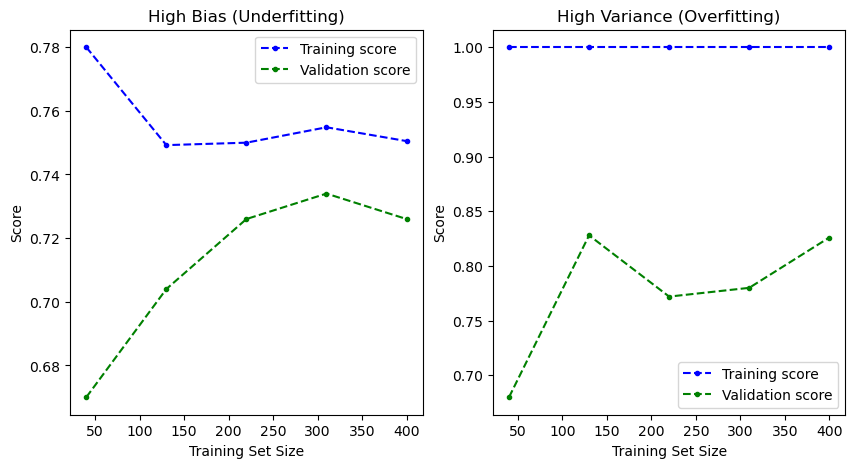

In [114]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=500, n_features=50, n_informative=5, n_classes=2, random_state=42)

model_A = DecisionTreeClassifier(max_depth = 1)
model_B = DecisionTreeClassifier(max_depth = None)

train_size_A, train_scores_A, val_scores_A = learning_curve(model_A, x, y, cv = 5, scoring = "accuracy")
train_size_B, train_scores_B, val_scores_B = learning_curve(model_B, x, y, cv = 5, scoring = "accuracy")

mts_a = np.mean(train_scores_A, axis=1)
mvs_a = np.mean(val_scores_A, axis=1)
mts_b = np.mean(train_scores_B, axis=1)
mvs_b = np.mean(val_scores_B, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(train_size_A, mts_a, color = "Blue", marker = ".", linestyle = "--", label = "Training score")
ax[0].plot(train_size_A, mvs_a, color = "Green", marker = ".", linestyle = "--", label = "Validation score")
ax[0].set_xlabel("Training Set Size")
ax[0].set_ylabel("Score")
ax[0].legend(loc = "best")
ax[0].set_title("High Bias (Underfitting)")
ax[1].plot(train_size_B, mts_b, color = "Blue", marker = ".", linestyle = "--", label = "Training score")
ax[1].plot(train_size_B, mvs_b, color = "Green", marker = ".", linestyle = "--", label = "Validation score")
ax[1].set_xlabel("Training Set Size")
ax[1].set_ylabel("Score")
ax[1].legend(loc = "best")
ax[1].set_title("High Variance (Overfitting)")


This is a textbook visualization of the Bias-Variance Tradeoff.

**Analysis of the Plots:**

1.  **Left Plot (High Bias / Underfitting):**

      * **The Convergence:** Both the Training Score (Blue) and Validation Score (Green) converge rapidly to a **mediocre score** (around 0.82-0.85).
      * **The Tiny Gap:** Notice how close the lines are. The model is not memorizing (Training score isn't 1.0), but it's too simple (`max_depth=1`) to capture the full complexity of the 5 informative features. It hit its "intelligence ceiling" early. Adding more data won't help it.

2.  **Right Plot (High Variance / Overfitting):**

      * **The Perfection:** The Training Score (Blue) stays at **1.0 (100%)** basically forever. The model has perfectly memorized every sample.
      * **The Gap:** Look at the massive gap between the Blue and Green lines. The Validation score is stuck much lower (around 0.80-0.85).
      * **The Diagnosis:** The model is learning the "noise" (the 45 useless features). It works great on the practice exam (Train) but fails the real exam (Test).


## **Mini-Project: Titanic Survival Prediction**

**Objective:**
Build a complete machine learning pipeline to predict passenger survival (`Survived`). You must demonstrate mastery of **Preprocessing**, **Model Training**, **Evaluation Metrics**, and **Bias-Variance Diagnosis**.

**Data Source:**
Use the file `Titanic.csv` that you uploaded.

  * **Target:** `Survived`
  * **Features:** `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`

-----

### Specifications

#### 1\. Data Preprocessing (The Setup)

  * **Cleaning:**
      * **Drop** irrelevant text/ID columns: `['PassengerId', 'Name', 'Ticket', 'Cabin']`.
      * **Handle Missing Values:**
          * `Age`: Fill missing values with the **median** age.
          * `Embarked`: **Drop rows** containing missing values (there are only 2).
  * **Encoding:**
      * `Sex`: Apply **Label Encoding** manually (map `'male'` $\to$ 0, `'female'` $\to$ 1).
      * `Embarked`: Apply **One-Hot Encoding** (use `pd.get_dummies` with `drop_first=True`).

#### 2\. Model Training (The Core)

  * **Split:** Use 80% Training and 20% Testing data (`random_state=42`).
  * **Model A (Logistic Regression):** Initialize with `max_iter=1000`.
  * **Model B (Decision Tree):** Initialize with `max_depth=None` (Unconstrained).

#### 3\. Evaluation (The Scoreboard)

  * **Metrics:**
      * Calculate and print the **F1 Score** for *both* models on the Test Set.
      * Calculate and print the **ROC-AUC Score** for *both* models on the Test Set.
          * *Crucial Reminder:* ROC-AUC requires **probabilities** (`.predict_proba()`), not just class predictions (`.predict()`).
  * **Diagnostics (Visualizing Bias/Variance):**
      * Generate a **Learning Curve** for the **Decision Tree** only.
      * Use `sklearn.model_selection.learning_curve` with `cv=5`.
      * Plot the **Training Score** (mean) and **Validation Score** (mean) on the same graph as training size increases.

#### 4\. Analysis (The "Why")

*Looking at the Learning Curve for the Decision Tree, does the model suffer from High Bias (Underfitting) or High Variance (Overfitting)? Explain your reasoning based on the gap between the two lines.*

-----

**Success Criteria:**

  * Pipeline runs without errors on `Titanic.csv`.
  * All encodings are applied correctly to the specific columns (`Sex`, `Embarked`).
  * F1 and AUC scores are printed for both models.
  * The Learning Curve plot is displayed.
  * The analysis question is answered correctly.


For Logistic Regression
-------------------
Precision = 0.6923076923076923
Recall = 0.782608695652174
F1 Score = 0.7346938775510203
AOC Score: 0.8515489961441298 
For Decision Tree
-------------------
Precision = 0.6623376623376623
Recall = 0.7391304347826086
F1 Score = 0.6986301369863014
AOC Score: 0.7379337854008776


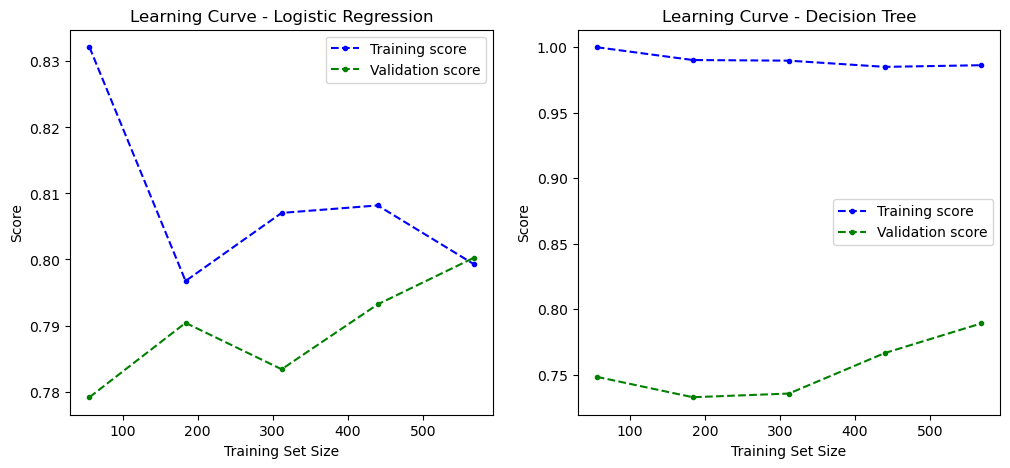

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

## Data Cleaning
df = pd.read_csv(r"Data/Titanic.csv")
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)

df = df.dropna(subset = ["Embarked"])

## Encoding
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(data = df, columns = ["Embarked"], drop_first = True)

## Split into test and train
x = df.drop("Survived", axis = 1)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Logistic Regression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
    ###  predict_proba(x_test) returns two columns: [Probability of 0, Probability of 1].
    ### roc_auc_score expects one column: just the Probability of 1
y_prob_lr = log_reg.predict_proba(x_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
pre_lr = tp/(tp + fp)
rec_lr = tp/(tp + fn)
f1_lr = (2 * pre_lr * rec_lr)/(pre_lr + rec_lr)
print("For Logistic Regression")
print("-------------------")
print(f"Precision = {pre_lr}\nRecall = {rec_lr}\nF1 Score = {f1_lr}")
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("AOC Score:", roc_auc_score(y_test, y_prob_lr),"\n===========================")

## Decision Tree
dtree = DecisionTreeClassifier(max_depth = None)
dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
y_prob_dt = dtree.predict_proba(x_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
pre_dt = tp/(tp + fp)
rec_dt = tp/(tp + fn)
f1_dt = (2 * pre_dt * rec_dt)/(pre_dt + rec_dt)
print("For Decision Tree")
print("-------------------")
print(f"Precision = {pre_dt}\nRecall = {rec_dt}\nF1 Score = {f1_dt}")
print("AOC Score:", roc_auc_score(y_test, y_prob_dt))

## Generate a learning curve
train_sizes_lr, train_scores_lr, val_scores_lr = learning_curve(log_reg, x_train, y_train, cv = 5, scoring = "accuracy")
train_sizes_dt, train_scores_dt, val_scores_dt = learning_curve(dtree, x_train, y_train, cv = 5, scoring = "accuracy")

mts_lr = np.mean(train_scores_lr, axis = 1)
mvs_lr = np.mean(val_scores_lr, axis = 1)
mts_dt = np.mean(train_scores_dt, axis = 1)
mvs_dt = np.mean(val_scores_dt, axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_sizes_lr, mts_lr, color = "Blue", marker = ".", linestyle = "--", label = "Training score")
ax[0].plot(train_sizes_lr, mvs_lr, color = "Green", marker = ".", linestyle = "--", label = "Validation score")
ax[0].set_xlabel("Training Set Size")
ax[0].set_ylabel("Score")
ax[0].legend(loc = "best")
ax[0].set_title("Learning Curve - Logistic Regression")
ax[1].plot(train_sizes_dt, mts_dt, color = "Blue", marker = ".", linestyle = "--", label = "Training score")
ax[1].plot(train_sizes_dt, mvs_dt, color = "Green", marker = ".", linestyle = "--", label = "Validation score")
ax[1].set_xlabel("Training Set Size")
ax[1].set_ylabel("Score")
ax[1].legend(loc = "best")
ax[1].set_title("Learning Curve - Decision Tree")
plt.show()

# The decision tree looks like it is overfitted(High Variance). The reason for that maybe there is no max_depth. So it performs really well on training and bad on validation.